# K Means clustering
K means clustering involves fitting the observations into a pre-defined number of groups; this starts with the placement of centroids. Those centroids then move towards the center of all the points in their cluster, then this process repeats until the clusters aren't moving any more.  

One downside to this simple technique is that you have to know the number of clusters that you want to use beforehand, rather than with techniques such as heirarchical clustering. Below is a simple implementation of the K means algorithm using the classical iris dataset. 


In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing 
import numpy as np

%matplotlib inline

In [2]:
# Read in our simple data 
iris = pd.read_csv('Iris.csv').drop('Id', 1)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


The 4 features that we have appear to be on different scales, which might be a problem with distance-based methods, as those on a larger scale will have more power than those magnitudes smaller. We can get around this by normalising and scaling our data. 

In [3]:
species = iris['Species']
iris = iris.drop('Species', 1)

# Get the column names 
colnames = list(iris.columns.values)

# Pre-process the data without the string column for species 
iris_scaled = pd.DataFrame(preprocessing.StandardScaler().fit_transform(iris))
iris_scaled.columns = colnames
iris_scaled.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


Note that the metrics have obviously become completely wrong in this process, but I have kept the column names purely for comparison reasons. 

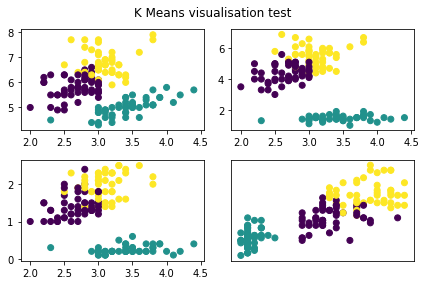

In [4]:
# Instantiate a model with 3 centers
kmeans = KMeans(3)

# Then fit the model to your data using the fit method
model = kmeans.fit(iris_scaled)

# Finally predict the labels on the same data to show the category that point belongs to
labels = model.predict(iris_scaled)

# Plot the results and see if they make sense
plt.subplot(221)
plt.scatter(iris.iloc[:, 1], iris.iloc[:, 0], c = labels)

plt.subplot(222)
plt.scatter(iris.iloc[:, 1], iris.iloc[:, 2], c = labels)

plt.subplot(223)
plt.scatter(iris.iloc[:, 1], iris.iloc[:, 3], c = labels)

plt.subplot(224)
plt.scatter(iris.iloc[:, 3], iris.iloc[:, 0], c = labels)

plt.suptitle('K Means visualisation test')
plt.tight_layout()
plt.subplots_adjust(top = .9)
plt.tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=False, right=False, left=False, labelleft=False)
plt.show()

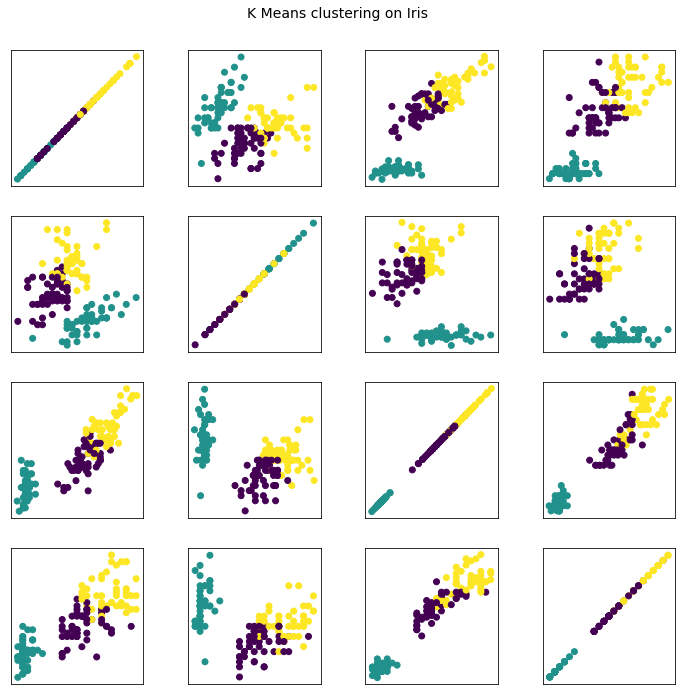

In [5]:
def plot_clusters(idx_1, idx_2, labels, axes):
    """
    Take two indexes for iris data and labels to plot 
    """
    axes.scatter(iris.iloc[:, idx_1], iris.iloc[:, idx_2], c = labels)
    axes.tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=False, right=False, left=False, labelleft=False)

fig, ax = plt.subplots(nrows = 4, ncols = 4, figsize = (10, 10))
fig.tight_layout()
fig.suptitle('K Means clustering on Iris', fontsize = 14)
fig.subplots_adjust(top = .92)

# Loop through the features and plot them 
count = 0

for i in range(4):
    for j in range(4):
        plot_clusters(i, j, labels, ax.flatten()[count])
        count += 1

## Scoring clusters and finding the best value for K
While in this simple example it might intuitive and capable of finding the correct number of clusters purely by plotting, when the dimensions increases, you might find it more difficult to achieve this visually. That is where scoring the distance between the cluster centers and the points of said cluster can come in handy. Let's have a look at what that achieves here, and write a function that allows us to simply and quickly calculate and compare different values of `k`. 

In [6]:
def calculate_clusters_score(X, k = 3):
    """
    Take the data to be fitted, return a score for n clusters on the data 
    """
    kmeans = KMeans(k)
    model = kmeans.fit(X)
    return model.score(X)

In [7]:
for k in range(1,11):
    print(calculate_clusters_score(iris_scaled, k))

-600.0
-223.73200573676348
-140.96581663074699
-114.42714544645854
-91.02916928379732
-80.2306070450696
-72.2571940516379
-62.72840653535505
-54.2007481425728
-47.59449627062263


We can see that the score is increasing as we increase the number of clusters that we are using. This is a quirk of `sklearn` and to get a more intuitive understanding of the error, we should take the absolute of this value and work it in to our function. 

In [8]:
def calculate_clusters_score_abs(X, k = 3):
    """
    Take the data to be fitted, return a score for n clusters on the data 
    """
    kmeans = KMeans(k)
    model = kmeans.fit(X)
    return np.abs(model.score(X))

In [9]:
for k in range(1,11):
    print(calculate_clusters_score_abs(iris_scaled, k))

600.0
223.73200573676348
140.96581663074699
114.61550694959806
91.0974193592428
80.24972235577131
71.31982095188795
62.641008351188006
54.61598384854028
47.272923608486025


We can view these values as SSE; the sum of squared error. As the number of clusters increases, so the error will lower until eventually we have a cluster for each data point in the set. That is why plotting this can be useful as we are looking for an 'elbow' in the plot that shows the point of diminishing returns when it comes to adding more clusters, and the data begins to 'plateau' off with increasing number of clusters. 

In [10]:
def plot_sse(X, k_start = 1, k_end = 10, highlight = 3):
    scores = []
    for k in range(k_start, k_end + 1):
        scores.append(calculate_clusters_score_abs(iris_scaled, k))
        
    plt.plot(range(k_start, k_end + 1), scores)
    plt.scatter(highlight, scores[highlight - 1],marker = 'o', facecolors='none', edgecolors='r')
    plt.show()

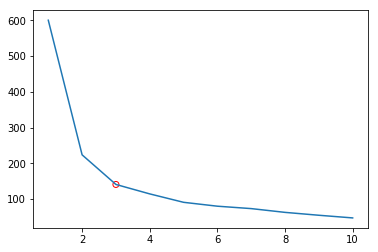

In [11]:
plot_sse(iris_scaled)

There could be an argument here that 2 clusters works well for the data, but I have highlighted 3 here on the plot as that is the value that we know to be true! 